# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of the Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [127]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [128]:
%pip install --upgrade plotly


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Statements

In [129]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### Notebook Presentation

In [130]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [131]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [132]:
print(f"shape: {df_data.shape}")
print(f"column names: {df_data.columns}")
print(f"number of NaN values: {df_data.isna().values.sum()}")
print(f"number of duplicated rows: {df_data.duplicated().values.sum()}")

shape: (4324, 9)
column names: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
number of NaN values: 3360
number of duplicated rows: 0


In [133]:
# Price data is missing for the majority of the space missions. See below. 
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [134]:
# Dropping the NaN values would result in the majority of the dataset being removed.
print(f"shape after removing NaN values: {df_data.dropna().shape}")


shape after removing NaN values: (964, 9)


In [135]:
# Add a new column to flag rows with no price.
df_data["Price_Included"] = df_data["Price"].isna().astype(int)

In [136]:
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Price_Included
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,0
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,0
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,0
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,0
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1


In [137]:
# The first two columns (Unnamed: 0.1 and Unamed:0) are not needed and can be dropped. 
df_data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Price_Included
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,0
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1


In [138]:
# convert Price from strings to numberic values
df_data["Price"] = pd.to_numeric(df_data["Price"],errors="coerce")

In [139]:
df_data.dtypes

Organisation       object
Location           object
Date               object
Detail             object
Rocket_Status      object
Price             float64
Mission_Status     object
Price_Included      int64
dtype: object

## Descriptive Statistics

In [140]:
df_data.describe()

,Price,Price_Included
count,949.00,"4,324.00"
mean,129.80,0.78
std,143.22,0.42
min,5.30,0.00
25%,40.00,1.00
50%,62.00,1.00
75%,164.00,1.00
max,450.00,1.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [141]:
launches_per_organization = df_data.groupby("Organisation")["Organisation"].value_counts()
launches_per_organization

Organisation
AEB                    3
AMBA                   8
ASI                    9
Arianespace          279
Arm??e de l'Air        4
Blue Origin           12
Boeing               136
CASC                 251
CASIC                  5
CECLES                 4
CNES                   8
Douglas                1
EER                    1
ESA                   13
Eurockot              13
ExPace                10
Exos                   4
General Dynamics     251
IAI                   11
ILS                   46
IRGC                   1
ISA                   13
ISAS                  30
ISRO                  76
JAXA                   7
KARI                   3
KCST                   5
Khrunichev             1
Kosmotras             22
Land Launch            7
Landspace              1
Lockheed              79
MHI                   84
MITT                   7
Martin Marietta      114
NASA                 203
Northrop              83
OKB-586                2
OneSpace               1
RAE         

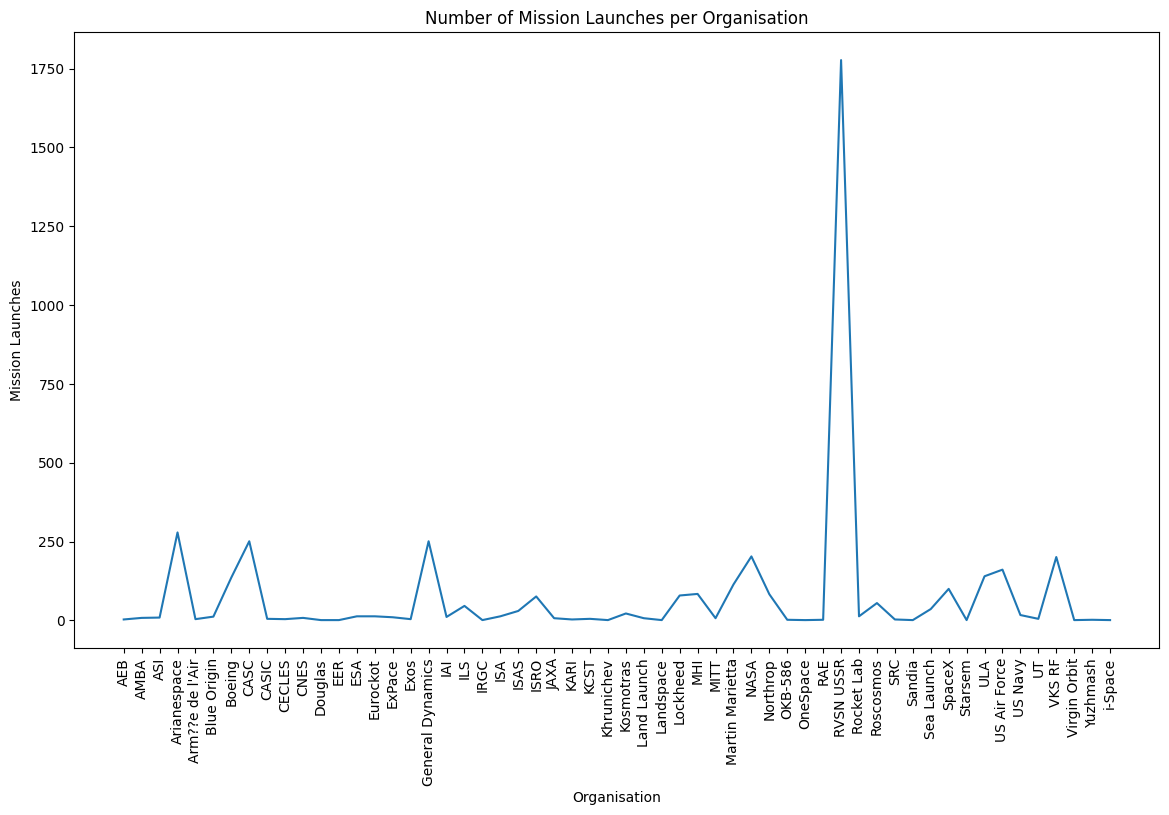

In [142]:
plt.figure(figsize=(14, 8))
plt.plot(launches_per_organization)
plt.xticks(rotation=90)
plt.title("Number of Mission Launches per Organisation")
plt.xlabel("Organisation")
plt.ylabel("Mission Launches")
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [143]:
number_unique_rockets = df_data['Detail'].nunique()
print(f"Number of unique rockets: {number_unique_rockets}")

number_retired_rockets = df_data[df_data.Rocket_Status == "StatusRetired"]["Rocket_Status"].count()
print(f"Number of retired rockets: {number_retired_rockets}")

number_active_rockets = number_unique_rockets - number_retired_rockets
print(f"Number of active rockets (unique - retired): {number_active_rockets}")

Number of unique rockets: 4278
Number of retired rockets: 3534
Number of active rockets (unique - retired): 744


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [144]:
df_data["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [145]:
histogram = px.histogram(
    data_frame=df_data.sort_values(by="Price"),
    x=np.log10(df_data.Price), # calculate logarithmic cost to reduce visual impact of outliers
    title="Space Mission Costs",
    nbins=20,
)

histogram.update_layout(
    xaxis_title="Logarithmic Cost ($USD millions)",
    yaxis_title="Mission Launches",
)

histogram.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [146]:
# add a "Countries" column to the dataset
df_data["Countries"]=df_data["Location"].str.rsplit(",", n=1).str[1].str.strip() 

In [147]:
# replace locations with the actual country name
df_data["Countries"] = df_data["Countries"].str.replace("Yellow Sea", "China") 
df_data["Countries"] = df_data["Countries"].str.replace("New Mexico ", "USA")
df_data["Countries"] = df_data["Countries"].str.replace("Pacific Missile Range Facility", "USA")
df_data["Countries"] = df_data["Countries"].str.replace("Gran Canaria", "USA")
df_data["Countries"] = df_data["Countries"].str.replace("Shahrud Missile Test Site", "Iran")
df_data["Countries"] = df_data["Countries"].str.replace("Barents Sea", "Russia")

In [148]:
missions_by_country = df_data.groupby("Countries")["Countries"].value_counts()
missions_by_country

Countries
Australia           6
Brazil              3
China             269
France            303
India              76
Iran               14
Israel             11
Japan             126
Kazakhstan        701
Kenya               9
New Mexico          4
New Zealand        13
North Korea         5
Pacific Ocean      36
Russia           1398
South Korea         3
USA              1347
Name: count, dtype: int64

In [149]:
plt.figure(figsize=(14, 8), dpi=200)

choropleth_launches = px.choropleth(
    locationmode="country names",
    locations=missions_by_country.index,
    hover_name=missions_by_country.index,
    color=missions_by_country.values,
    color_continuous_scale="matter",
)

choropleth_launches.update_layout(coloraxis_colorbar={"title": "Mission Launches"})

choropleth_launches.show()

<Figure size 2800x1600 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [150]:
failures_by_country = df_data[df_data.Mission_Status.isin(["Failure", "Partial Failure", "Prelaunch Failure"])].groupby("Countries")["Countries"].value_counts()
failures_by_country

Countries
Australia          3
Brazil             3
China             25
France            18
India             13
Iran               9
Israel             2
Japan             13
Kazakhstan        93
New Mexico         4
New Zealand        2
North Korea        3
Pacific Ocean      3
Russia            93
South Korea        2
USA              159
Name: count, dtype: int64

In [151]:
plt.figure(figsize=(14, 8), dpi=200)

choropleth_failures = px.choropleth(
    locationmode="country names",
    locations=failures_by_country.index,
    hover_name=failures_by_country.index,
    color=failures_by_country.values,
    color_continuous_scale="matter",
)

choropleth_failures.update_layout(coloraxis_colorbar={"title": "Failed Mission Launches"})

choropleth_failures.show()

<Figure size 2800x1600 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [152]:
mission_status_by_countries_and_organizations = df_data.groupby(
    ["Countries", "Organisation", "Mission_Status"], as_index=False
)[["Countries", "Organisation", "Mission_Status"]].value_counts()
mission_status_by_countries_and_organizations

,Countries,Organisation,Mission_Status,count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [153]:
sunburst = px.sunburst(
    data_frame=mission_status_by_countries_and_organizations,
    path=["Countries", "Organisation", "Mission_Status"],
    values="count"
)

sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [154]:
# only including those rows for which price data is available
total_money_spent_by_organisation = df_data[df_data.Price_Included == 0].groupby(["Organisation"])["Price"].sum()
total_money_spent_by_organisation.sort_values(ascending=False)

Organisation
NASA              61,200.00
Arianespace       16,345.00
ULA               14,798.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
RVSN USSR              0.00
Name: Price, dtype: float64

# Analyse the Amount of Money Spent by Organisation per Launch

In [155]:
# only including those rows for which price data is available
money_spent_by_organisation_per_launch = df_data[df_data.Price_Included == 0].groupby(["Organisation"])["Price"].mean()
money_spent_by_organisation_per_launch.sort_values(ascending=False)

Organisation
NASA              450.00
Boeing            177.29
Arianespace       170.26
ULA               151.00
ILS               101.54
MHI                95.47
Martin Marietta    80.16
US Air Force       59.65
JAXA               56.00
SpaceX             54.99
Roscosmos          51.63
Northrop           47.35
VKS RF             46.94
Eurockot           41.80
CASC               40.13
ESA                37.00
Lockheed           35.00
ISRO               32.49
Kosmotras          29.00
ExPace             28.30
EER                20.00
Sandia             15.00
Virgin Orbit       12.00
Rocket Lab          7.50
RVSN USSR            NaN
Name: Price, dtype: float64

# Chart the Number of Launches per Year

In [156]:
# add a new column for Date time objects
df_data["Date_Time_Objects"] = pd.to_datetime(df_data.Date, format="mixed", utc=True) 

In [157]:
number_launches_per_year = df_data.groupby(df_data.Date_Time_Objects.dt.year)["Date"].count()
number_launches_per_year

Date_Time_Objects
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Date, Length: 64, dtype: int64

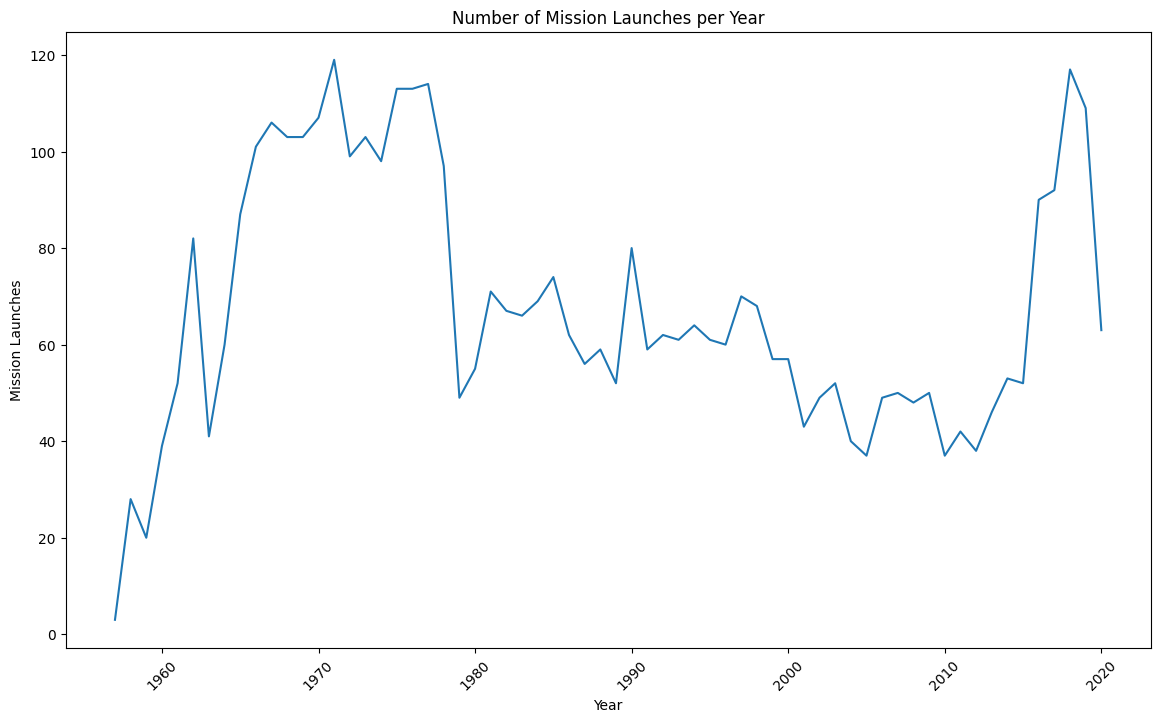

In [158]:
plt.figure(figsize=(14, 8))
plt.plot(number_launches_per_year)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Mission Launches")
plt.title("Number of Mission Launches per Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [159]:
number_of_launches_per_month = df_data.groupby(df_data.Date_Time_Objects.dt.month)["Date"].count()
number_of_launches_per_month

Date_Time_Objects
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Date, dtype: int64

In [160]:
rolling_launches_by_month = number_of_launches_per_month.rolling(window=2).mean()
rolling_launches_by_month

Date_Time_Objects
1       NaN
2    302.00
3    344.50
4    368.00
5    354.50
6    364.00
7    376.50
8    362.00
9    369.00
10   373.00
11   358.50
12   393.00
Name: Date, dtype: float64

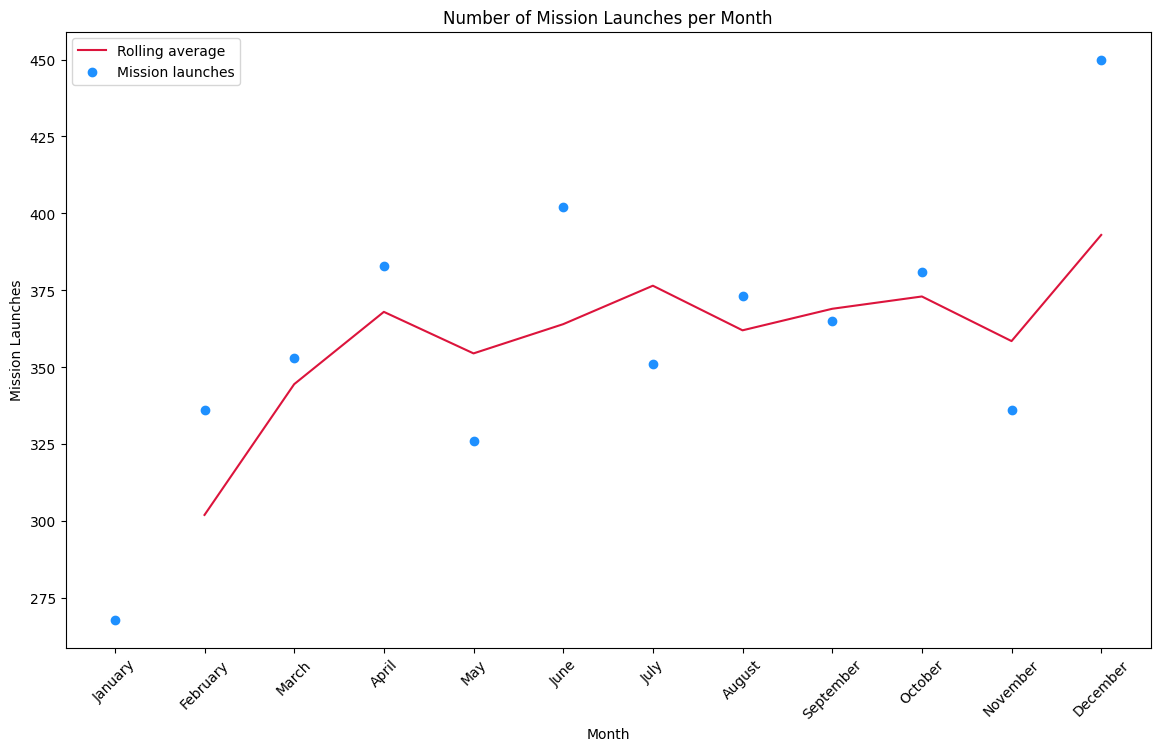

In [161]:
plt.figure(figsize=(14, 8))
plt.title("Number of Mission Launches per Month")
plt.xlabel("Month")
plt.xticks(
    rotation=45,
    ticks=range(1, 13),
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)
plt.ylabel("Mission Launches")
plt.plot(
    rolling_launches_by_month.index, rolling_launches_by_month.values, color="crimson", label="Rolling average"
)
plt.scatter(
    number_of_launches_per_month.index,
    number_of_launches_per_month.values,
    color="dodgerblue",
    label="Mission launches"
)
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

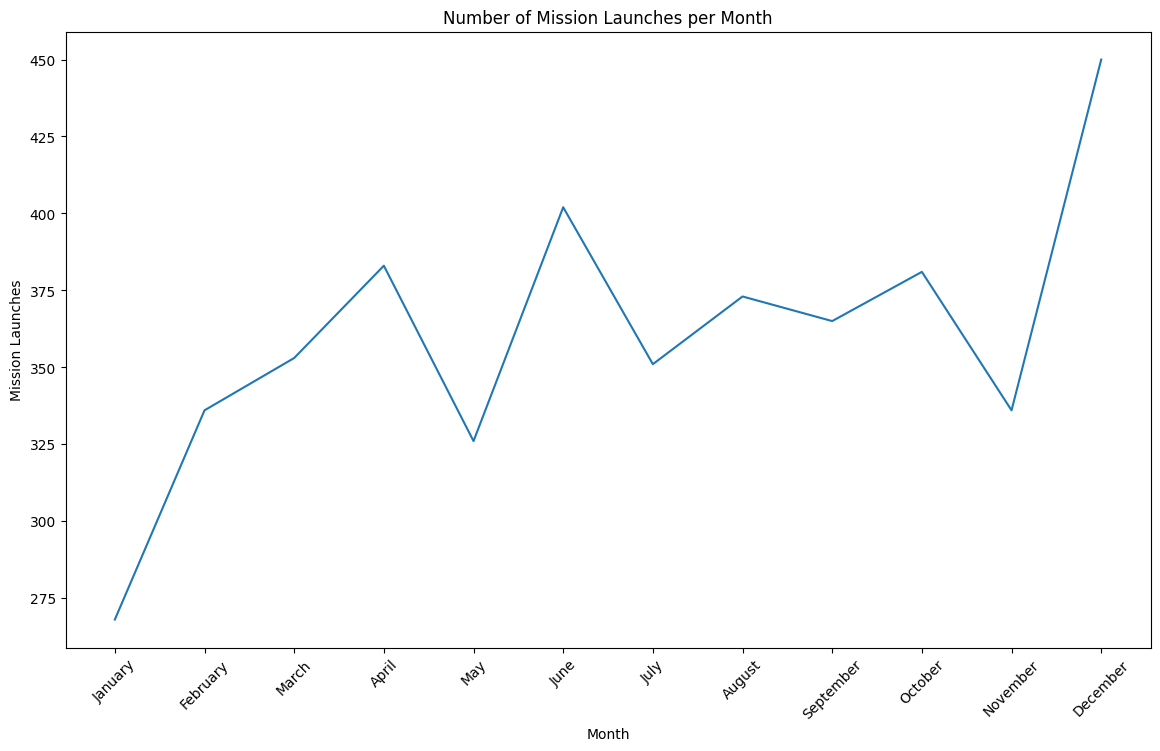

In [162]:
plt.figure(figsize=(14, 8))
plt.plot(number_of_launches_per_month)
plt.xticks(rotation=45)
plt.title("Number of Mission Launches per Month")
plt.xlabel("Month")
plt.xticks(
    ticks=range(1, 13),
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)
plt.ylabel("Mission Launches")
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [163]:
# only including those rows for which price data is available
average_launch_price_over_time = df_data[df_data.Price_Included == 0].groupby(df_data.Date_Time_Objects.dt.year)["Price"].mean()
average_launch_price_over_time

Date_Time_Objects
1964    63.23
1965    63.23
1966    59.00
1967    59.00
1968    59.00
1969    59.00
1970      NaN
1971      NaN
1972      NaN
1973      NaN
1981   450.00
1982   345.20
1983   366.16
1984   380.13
1985   408.08
1986   310.27
1987    30.80
1988   241.45
1989   380.83
1990   289.15
1991   391.43
1992   319.35
1993   276.73
1994   221.51
1995   325.00
1996   243.20
1997   221.74
1998   152.12
1999   128.51
2000   173.12
2001   290.70
2002   185.59
2003    80.51
2004    92.74
2005    95.79
2006   138.61
2007   125.70
2008   129.75
2009   180.29
2010   148.40
2011   146.60
2012   122.29
2013    90.55
2014   102.55
2015    91.55
2016    79.46
2017    69.49
2018    64.75
2019    59.61
2020    56.65
Name: Price, dtype: float64

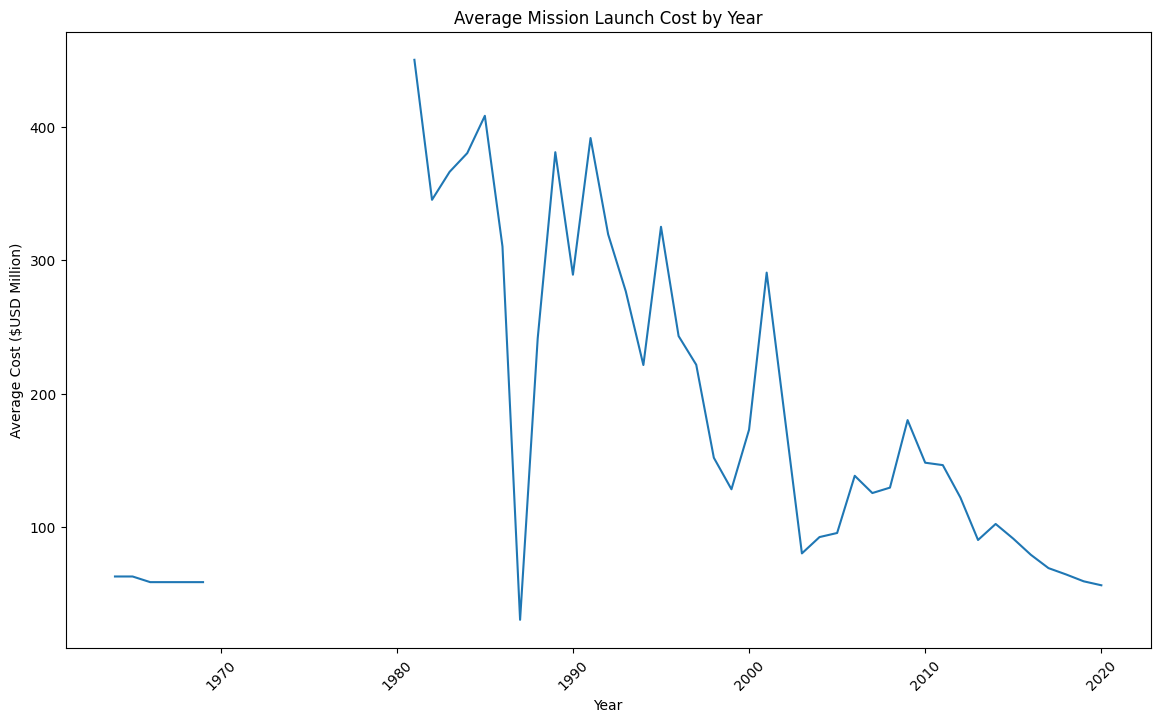

In [164]:
plt.figure(figsize=(14, 8))
plt.plot(average_launch_price_over_time)
plt.xticks(rotation=45)
plt.title("Average Mission Launch Cost by Year")
plt.xlabel("Year")
plt.ylabel("Average Cost ($USD Million)")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [165]:
number_launches_by_organization_per_year = df_data.groupby(["Organisation", df_data.Date_Time_Objects.dt.year])["Organisation"].value_counts().reset_index()
number_launches_by_organization_per_year


,Organisation,Date_Time_Objects,count
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [166]:
top_10_organizations_with_most_launches = number_launches_by_organization_per_year.groupby("Organisation")["count"].sum().sort_values(ascending=False).head(10)
top_10_organizations_with_most_launches

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [167]:
# only return the results for the organizations in the top 10
number_launches_by_top_organizations_per_year = number_launches_by_organization_per_year[number_launches_by_organization_per_year.Organisation.isin(top_10_organizations_with_most_launches.index)]
number_launches_by_top_organizations_per_year

,Organisation,Date_Time_Objects,count
12,Arianespace,1984,3
13,Arianespace,1985,4
14,Arianespace,1986,3
15,Arianespace,1987,2
16,Arianespace,1988,6
...,...,...,...
654,VKS RF,2016,4
655,VKS RF,2017,6
656,VKS RF,2018,5
657,VKS RF,2019,8


In [168]:
bar = px.bar(
    data_frame=number_launches_by_top_organizations_per_year,
    x=number_launches_by_top_organizations_per_year.Date_Time_Objects,
    y=number_launches_by_top_organizations_per_year["count"],
    color=number_launches_by_top_organizations_per_year.Organisation
)

bar.update_layout(
    title="Number of Mission Launches per Year for the Top 10 Organisations with the Most Launches",
    xaxis_title="Year",
    yaxis_title="Mission Launches",
)

bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [169]:
coldwar_df_data = df_data.copy() #create copy to avoid references to the original when renaming data later
coldwar_df_data = coldwar_df_data[(coldwar_df_data.Countries.isin(["Kazakhstan", "USA", "Russia"])) & (coldwar_df_data.Date_Time_Objects.dt.year <= 1991)]
coldwar_df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Price_Included,Countries,Date_Time_Objects
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,1,Kazakhstan,1991-12-20 00:00:00+00:00
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,1,Russia,1991-12-18 03:54:00+00:00
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,1,USA,1991-12-07 22:47:00+00:00
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,NaN,Success,1,USA,1991-11-28 13:23:00+00:00
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,NaN,Success,1,Russia,1991-11-27 03:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1,USA,1958-02-05 07:33:00+00:00
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1,USA,1958-02-01 03:48:00+00:00
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1,USA,1957-12-06 16:44:00+00:00
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1,Kazakhstan,1957-11-03 02:30:00+00:00


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [170]:
coldwar_df_data["Countries"] = coldwar_df_data["Countries"].str.replace("Kazakhstan", "Russia")

In [171]:
number_launches_usa_russia = coldwar_df_data["Countries"].value_counts()
number_launches_usa_russia

Countries
Russia    1770
USA        662
Name: count, dtype: int64

In [172]:
pie_chart = px.pie(
    labels=number_launches_usa_russia.index,
    values=number_launches_usa_russia.values,
    names=number_launches_usa_russia.index,
    hole=0.5,
    title="Total Number of Mission Launches for Russia and USA",
)

pie_chart.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [173]:
number_launches_per_year_usa_russia = coldwar_df_data.groupby(["Countries", coldwar_df_data.Date_Time_Objects.dt.year])["Countries"].value_counts().reset_index()
number_launches_per_year_usa_russia


,Countries,Date_Time_Objects,count
0,Russia,1957,2
1,Russia,1958,5
2,Russia,1959,4
3,Russia,1960,9
4,Russia,1961,9
...,...,...,...
65,USA,1987,6
66,USA,1988,7
67,USA,1989,16
68,USA,1990,26


In [174]:
bar = px.bar(
    data_frame=number_launches_per_year_usa_russia,
    x=number_launches_per_year_usa_russia.Date_Time_Objects,
    y=number_launches_per_year_usa_russia["count"],
    color=number_launches_per_year_usa_russia.Countries
)

bar.update_layout(
    title="Number of Mission Launches per year for USA and Russia",
    xaxis_title="Year",
    yaxis_title="Mission Launches",
)

bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [175]:
mission_failures_per_year_usa_russia = coldwar_df_data[coldwar_df_data.Mission_Status != "Success"].groupby(["Countries", coldwar_df_data.Date_Time_Objects.dt.year])["Countries"].value_counts().reset_index()
mission_failures_per_year_usa_russia

,Countries,Date_Time_Objects,count
0,Russia,1958,4
1,Russia,1959,2
2,Russia,1960,6
3,Russia,1961,4
4,Russia,1962,7
...,...,...,...
56,USA,1986,2
57,USA,1987,1
58,USA,1988,1
59,USA,1990,1


In [176]:
bar = px.bar(
    data_frame=mission_failures_per_year_usa_russia,
    x=mission_failures_per_year_usa_russia.Date_Time_Objects,
    y=mission_failures_per_year_usa_russia["count"],
    color=mission_failures_per_year_usa_russia.Countries
)

bar.update_layout(
    title="Number of Failures each year for USA and Russia",
    xaxis_title="Year",
    yaxis_title="Number of Failures",
)

bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [177]:
coldwar_mission_statuses_by_year = coldwar_df_data.groupby(["Countries", coldwar_df_data.Date_Time_Objects.dt.year, "Mission_Status"])["Countries"].value_counts().reset_index()
coldwar_mission_statuses_by_year

,Countries,Date_Time_Objects,Mission_Status,count
0,Russia,1957,Success,2
1,Russia,1958,Failure,4
2,Russia,1958,Success,1
3,Russia,1959,Failure,1
4,Russia,1959,Partial Failure,1
...,...,...,...,...
155,USA,1990,Failure,1
156,USA,1990,Success,25
157,USA,1991,Failure,1
158,USA,1991,Partial Failure,1


In [178]:
# add a mission status percentage column
coldwar_mission_statuses_by_year["Mission_Status_Percentage"] = coldwar_mission_statuses_by_year["count"]/coldwar_mission_statuses_by_year.groupby([coldwar_mission_statuses_by_year.Countries, coldwar_mission_statuses_by_year.Date_Time_Objects])["count"].transform("sum") * 100
coldwar_mission_statuses_by_year

,Countries,Date_Time_Objects,Mission_Status,count,Mission_Status_Percentage
0,Russia,1957,Success,2,100.00
1,Russia,1958,Failure,4,80.00
2,Russia,1958,Success,1,20.00
3,Russia,1959,Failure,1,25.00
4,Russia,1959,Partial Failure,1,25.00
...,...,...,...,...,...
155,USA,1990,Failure,1,3.85
156,USA,1990,Success,25,96.15
157,USA,1991,Failure,1,5.56
158,USA,1991,Partial Failure,1,5.56


In [179]:
# keep only mission status success
coldwar_mission_status_success = coldwar_mission_statuses_by_year[coldwar_mission_statuses_by_year.Mission_Status == "Success"]
coldwar_mission_status_success

,Countries,Date_Time_Objects,Mission_Status,count,Mission_Status_Percentage
0,Russia,1957,Success,2,100.00
2,Russia,1958,Success,1,20.00
5,Russia,1959,Success,2,50.00
7,Russia,1960,Success,3,33.33
9,Russia,1961,Success,5,55.56
...,...,...,...,...,...
151,USA,1987,Success,5,83.33
153,USA,1988,Success,6,85.71
154,USA,1989,Success,16,100.00
156,USA,1990,Success,25,96.15


In [180]:
bar = px.bar(
    data_frame=coldwar_mission_status_success,
    x=coldwar_mission_status_success.Date_Time_Objects,
    y=100-coldwar_mission_status_success.Mission_Status_Percentage, # subtract from 100 to get percentage of failures
    color=coldwar_mission_status_success.Countries
)

bar.update_layout(
    title="Percentage Failure (including partial failures) each year for USA and Russia",
    xaxis_title="Year",
    yaxis_title="Failure Percentage",
)

bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [181]:
launches_by_country_by_year = df_data.groupby(["Countries", df_data.Date_Time_Objects.dt.year])["Countries"].value_counts().reset_index()
launches_by_country_by_year

,Countries,Date_Time_Objects,count
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1969,1
3,Australia,1970,2
4,Australia,1971,1
...,...,...,...
424,USA,2016,27
425,USA,2017,30
426,USA,2018,33
427,USA,2019,24


In [182]:
country_with_most_launches_per_year = launches_by_country_by_year.sort_values(by="count", ascending=False)
country_with_most_launches_per_year.drop_duplicates(["Date_Time_Objects"], inplace=True)
country_with_most_launches_per_year.sort_values("Date_Time_Objects")

,Countries,Date_Time_Objects,count
207,Kazakhstan,1957,2
366,USA,1958,23
367,USA,1959,16
368,USA,1960,30
369,USA,1961,43
...,...,...,...
424,USA,2016,27
425,USA,2017,30
53,China,2018,39
54,China,2019,34


In [183]:
bar = px.bar(
    data_frame=country_with_most_launches_per_year,
    x=country_with_most_launches_per_year.Date_Time_Objects,
    y=country_with_most_launches_per_year["count"],
    color=country_with_most_launches_per_year.Countries
)

bar.update_layout(
    title="Country with Most Number of Mission Launches per Year",
    xaxis_title="Year",
    yaxis_title="Mission Launches",
)

bar.show()

In [184]:
successful_launches_by_country_by_year = df_data[df_data.Mission_Status == "Success"].groupby(["Countries", df_data.Date_Time_Objects.dt.year])["Countries"].value_counts().reset_index()
successful_launches_by_country_by_year

,Countries,Date_Time_Objects,count
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1971,1
3,China,1970,1
4,China,1971,1
...,...,...,...
381,USA,2016,26
382,USA,2017,30
383,USA,2018,33
384,USA,2019,24


In [185]:
country_with_most_successful_launches_per_year = successful_launches_by_country_by_year.sort_values(by="count", ascending=False)
country_with_most_successful_launches_per_year.drop_duplicates(["Date_Time_Objects"], inplace=True)
country_with_most_successful_launches_per_year.sort_values("Date_Time_Objects")

,Countries,Date_Time_Objects,count
175,Kazakhstan,1957,2
323,USA,1958,5
324,USA,1959,6
325,USA,1960,16
326,USA,1961,27
...,...,...,...
381,USA,2016,26
382,USA,2017,30
43,China,2018,38
44,China,2019,32


In [186]:
bar = px.bar(
    data_frame=country_with_most_successful_launches_per_year,
    x=country_with_most_successful_launches_per_year.Date_Time_Objects,
    y=country_with_most_successful_launches_per_year["count"],
    color=country_with_most_successful_launches_per_year.Countries
)

bar.update_layout(
    title="Country with Most Number of Successful Mission Launches Each Year",
    xaxis_title="Year",
    yaxis_title="Mission Launches",
)

bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [187]:
number_launches_by_organization_each_year = df_data.groupby(["Organisation", df_data.Date_Time_Objects.dt.year])["Organisation"].value_counts().reset_index()
number_launches_by_organization_each_year

,Organisation,Date_Time_Objects,count
0,AEB,1997,1
1,AEB,1999,1
2,AEB,2003,1
3,AMBA,1958,7
4,AMBA,1967,1
...,...,...,...
658,VKS RF,2020,3
659,Virgin Orbit,2020,1
660,Yuzhmash,1969,1
661,Yuzhmash,1991,1


In [188]:
organization_with_most_launches_each_year = number_launches_by_organization_each_year.sort_values(by="count", ascending=False)
organization_with_most_launches_each_year.drop_duplicates(["Date_Time_Objects"], inplace=True)
organization_with_most_launches_each_year.sort_values("Date_Time_Objects")

,Organisation,Date_Time_Objects,count
497,RVSN USSR,1957,2
624,US Navy,1958,12
599,US Air Force,1959,10
600,US Air Force,1960,21
601,US Air Force,1961,23
...,...,...,...
117,CASC,2016,22
578,SpaceX,2017,18
119,CASC,2018,37
120,CASC,2019,27


In [189]:
bar = px.bar(
    data_frame=organization_with_most_launches_each_year,
    x=organization_with_most_launches_each_year.Date_Time_Objects,
    y=organization_with_most_launches_each_year["count"],
    color=organization_with_most_launches_each_year.Organisation
)

bar.update_layout(
    title="Organization with Most Number of  Launches Each Year",
    xaxis_title="Year",
    yaxis_title="Missions",
)

bar.show()